### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [3]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [6]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance

from math import radians,cos,sin,asin,sqrt

import folium
from folium.plugins import HeatMap

import datetime
from scipy.stats import ttest_ind

import matplotlib
matplotlib.rcParams.update({'font.size':12})




,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [11]:
uber_data = pd.read_csv(r'C:\\Users\\mohit\\OneDrive\\Desktop\\Uber Trips Analysis\\data\\uber-raw-data-aug14.csv')
display(uber_data.head(10))

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512
5,8/1/2014 0:13:00,40.7349,-74.0033,B02512
6,8/1/2014 0:15:00,40.7279,-73.9542,B02512
7,8/1/2014 0:17:00,40.7210,-73.9937,B02512
8,8/1/2014 0:19:00,40.7195,-74.0060,B02512
9,8/1/2014 0:20:00,40.7448,-73.9799,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [22]:
# Convert the 'Date/Time' column to datetime format
#print(type(uber_data.loc[0,'Date/Time']))
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'])


# Group by date and count the number of pickups
uber_data['Date'] = uber_data['Date/Time'].dt.date
pickup_counts = uber_data.groupby('Date')['Date'].count()
print(pickup_counts)

# Find the date with the highest number of pickups

date_with_highest_pickups = pickup_counts.idxmax()
print("date with highest pick up is",date_with_highest_pickups)

Date
2014-08-01    32353
2014-08-02    28678
2014-08-03    23146
2014-08-04    24952
2014-08-05    28094
2014-08-06    30495
2014-08-07    32759
2014-08-08    30411
2014-08-09    26286
2014-08-10    20584
2014-08-11    22632
2014-08-12    29646
2014-08-13    29788
2014-08-14    30457
2014-08-15    28974
2014-08-16    26234
2014-08-17    21209
2014-08-18    21956
2014-08-19    24834
2014-08-20    27955
2014-08-21    32304
2014-08-22    29512
2014-08-23    27097
2014-08-24    22036
2014-08-25    22093
2014-08-26    24550
2014-08-27    27018
2014-08-28    28597
2014-08-29    27424
2014-08-30    23930
2014-08-31    23271
Name: Date, dtype: int64
date with highest pick up is 2014-08-07


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [24]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups

print(uber_data.loc[uber_data['Date']==date_with_highest_pickups])
# Get the count of pickups on the highest date


print(pickup_counts.max())

                 Date/Time      Lat      Lon    Base        Date
6944   2014-08-07 00:03:00  40.7455 -73.9895  B02512  2014-08-07
6945   2014-08-07 00:09:00  40.7499 -74.0025  B02512  2014-08-07
6946   2014-08-07 00:10:00  40.7417 -74.0037  B02512  2014-08-07
6947   2014-08-07 00:16:00  40.6416 -73.7879  B02512  2014-08-07
6948   2014-08-07 00:16:00  40.7008 -73.9405  B02512  2014-08-07
...                    ...      ...      ...     ...         ...
783791 2014-08-07 23:47:00  40.7337 -73.9925  B02764  2014-08-07
783792 2014-08-07 23:47:00  40.7245 -73.9934  B02764  2014-08-07
783793 2014-08-07 23:49:00  40.7624 -74.0204  B02764  2014-08-07
783794 2014-08-07 23:53:00  40.7801 -73.9589  B02764  2014-08-07
783795 2014-08-07 23:54:00  40.7648 -73.9783  B02764  2014-08-07

[32759 rows x 5 columns]
32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [28]:
# Count the number of unique TLC base companies

unique_TLC_counts = uber_data.groupby('Base')['Base'].count()
print(len(unique_TLC_counts))


5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [31]:
# Group by TLC base company and count the number of pickups
print(unique_TLC_counts)

# Find the TLC base company with the highest number of pickups
print("Base Company with highest number of pickups",unique_TLC_counts.idxmax())

Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
Name: Base, dtype: int64
Base Company with highest number of pickups B02617


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [32]:
# Group by TLC base company and count the number of pickups
print(unique_TLC_counts)



Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
Name: Base, dtype: int64


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [33]:
# Extract the hour from the 'Date/Time' column

uber_data['Hour'] = uber_data['Date/Time'].dt.hour
# Group by hour and count the number of pickups
hourly_pickup_counts = uber_data.groupby('Hour')['Hour'].count()
print(hourly_pickup_counts)
# Find the hour with the highest number of pickups

print("highest pickup hour is ",hourly_pickup_counts.idxmax())


Hour
0     21451
1     14471
2     10105
3     10376
4     11774
5     16525
6     24907
7     34064
8     34566
9     30195
10    30706
11    31778
12    32106
13    35764
14    40644
15    48197
16    53481
17    57122
18    55390
19    53008
20    51674
21    51354
22    46008
23    33609
Name: Hour, dtype: int64
highest pickup hour is  17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

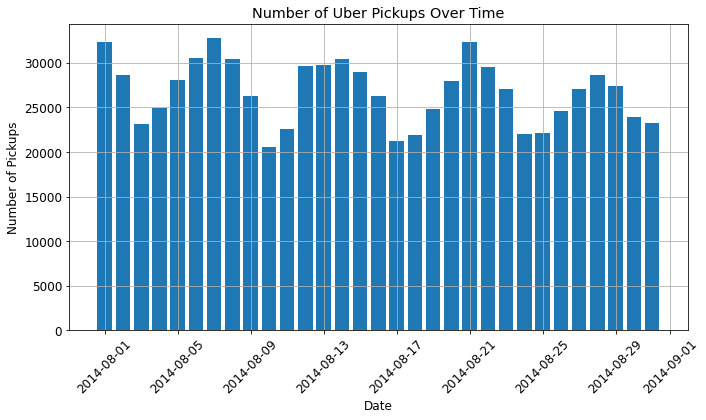

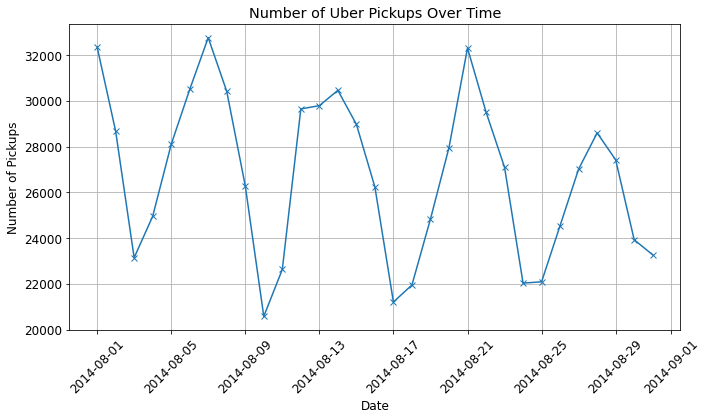

In [37]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
plt.figure(figsize=(10, 6))
plt.bar(pickup_counts.index, pickup_counts.values)
plt.title('Number of Uber Pickups Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


# Create a line plot to visualize the number of pickups over time

plt.figure(figsize=(10, 6))
plt.plot(pickup_counts.index, pickup_counts.values, marker='x')
plt.title('Number of Uber Pickups Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

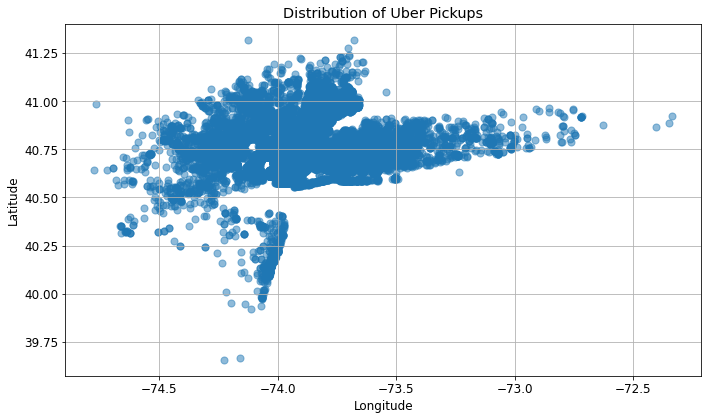

In [38]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.figure(figsize=(10, 6))
plt.scatter(df['Lon'], df['Lat'], s=50, alpha=0.5)
plt.title('Distribution of Uber Pickups')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

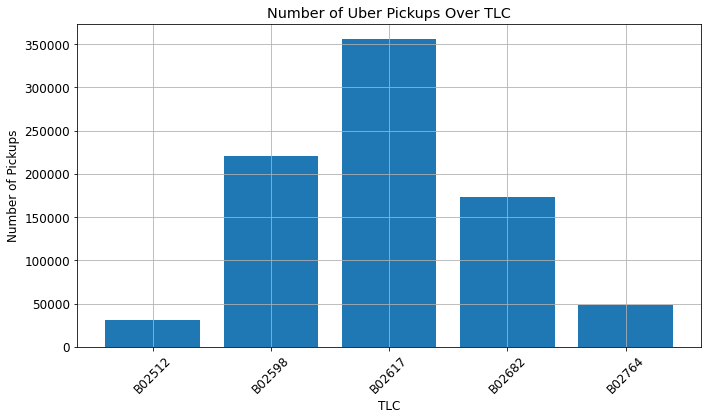

In [42]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
plt.figure(figsize=(10, 6))
plt.bar(unique_TLC_counts.index, unique_TLC_counts.values)
plt.title('Number of Uber Pickups Over TLC')
plt.xlabel('TLC')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

In [ ]:
# Group by day of the week and count the number of pickups

uber_data['DayOfWeek'] = uber_data['Date/Time'].dt.day_name()

pickup_counts_by_day = uber_data.groupby('DayOfWeek')['Date/Time'].count()

plt.figure(figsize=(8, 8))
plt.pie(pickup_counts_by_day, labels=pickup_counts_by_day.index, autopct='%1.2f%%', startangle=1000)
plt.title('Percentage Distribution of Uber Pickups by Day of the Week')
plt.axis('equal')

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
